### Predicting Selling Price with Towntype,flat type & lease year

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-Singaporeflatresale\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-Singaporeflatresale\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-Singaporeflatresale\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-Singaporeflatresale\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-Singaporeflatresale\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
180725,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,735000.0,63 years 03 months
180726,2024-05,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,815888.0,63 years 02 months
180727,2024-05,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,1032000.0,67 years 02 months
180728,2024-05,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,800000.0,62 years 05 months


In [3]:
df['lease_commence_date']=pd.to_datetime(df['lease_commence_date'], format = '%Y')
df['month']=pd.to_datetime(df['month'])
df['end_of_lease'] = df['lease_commence_date'] + pd.DateOffset(years=99)

In [4]:
df['end_of_lease']= pd.to_datetime(df['end_of_lease'])
# #removing the unnecessary columns as we get the lease start and end year.
df.drop('remaining_lease', axis= 1, inplace = True)

In [5]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
end_of_lease           0
dtype: int64

In [6]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date    datetime64[ns]
resale_price                  float64
end_of_lease           datetime64[ns]
dtype: object

In [7]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352265
3 ROOM              295928
5 ROOM              195402
EXECUTIVE            69664
2 ROOM               11827
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [8]:
replace_flat = {'MULTI-GENERATION' : 'MULTI GENERATION'}
df['flat_type']=df['flat_type'].replace(replace_flat)

In [9]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352265
3 ROOM              295928
5 ROOM              195402
EXECUTIVE            69664
2 ROOM               11827
1 ROOM                1304
MULTI GENERATION       543
Name: count, dtype: int64

In [10]:
len(df['flat_model'].unique())

34

In [13]:
df['flat_model'].value_counts()

flat_model
MODEL A, A2 & MODEL A-MAISONETTE    289708
Improved                            241783
New Generation                      188961
Standard & Simplified                74910
Premium Apartment                    46870
Apartment                            25584
Standard                             25160
Maisonette                           17448
Others                               10593
DBSS                                  3303
Adjoined flat                         1249
Type S1, S2                            653
Terrace                                447
Multi Generation                       264
Name: count, dtype: int64

In [12]:
flat_model_mapping = {
    'IMPROVED': 'Improved',
    'NEW GENERATION': 'New Generation',
    'New Generation': 'New Generation',
    'MODEL A': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'Model A': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'MODEL A-MAISONETTE': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'MAISONETTE': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'IMPROVED-MAISONETTE': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'Improved-Maisonette': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'Premium Maisonette':'MODEL A, A2 & MODEL A-MAISONETTE',
    'Model A2': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'Model A-Maisonette':'MODEL A, A2 & MODEL A-MAISONETTE',
    'STANDARD': 'Standard & Simplified',
    'SIMPLIFIED': 'Standard & Simplified',
    'Simplified': 'Standard & Simplified',
    'STANDARD & SIMPLIFIED':'Standard & Simplified',
    'APARTMENT': 'Others',
    'TERRACE': 'Others',
    '2-ROOM': 'Others',
    '2-room' : 'Others',
    '3Gen': 'Others',
    'MULTI GENERATION': 'Others',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'Premium Apartment Loft': 'Premium Apartment',
    'Type S1': 'Type S1, S2',
    'Type S2': 'Type S1, S2'  
}

df['flat_model']=df['flat_model'].replace(flat_model_mapping)

In [14]:
a=df['block'].unique()
unique_blocks_str = "','".join(a)
print(unique_blocks_str)

309','216','211','202','235','232','308','220','219','247','320','252','223','230','329','313','117','110','343','345','346','121','129','130','128','127','126','403','404','405','417','418','419','441','442','443','444','450','435','433','434','424','425','466','471','474','570','586','455','465','463','564','560','558','559','538','534','601','603','604','608','611','505','503','610','607','524','513','643','542','548','550','639','637','330','333','156','152','178','180','209','231','254','103','105','344','324','120','124','414','438','427','428','473','573','585','456','544','640','638','646','150','179','336','335','401','439','430','460','459','716','545','620','622','259','101','18','28','29','30','75','76','501','502','504','2','20','21','59','58','55','22','104','107','69','33','46','116','115','125','138','87','100','412','402','416','136','529','510','525','218','213','532','533','536','537','44','540','702','615','712','50','54','606','616','15','34','36','35','41','42','5

In [15]:
unique_blocks=['309','216','211','202','235','232','308','220','219','247','320','252','223','230','329','313','117','110','343','345','346','121','129','130','128','127','126','403','404','405','417','418','419','441','442','443','444','450','435','433','434','424','425','466','471','474','570','586','455','465','463','564','560','558','559','538','534','601','603','604','608','611','505','503','610','607','524','513','643','542','548','550','639','637','330','333','156','152','178','180','209','231','254','103','105','344','324','120','124','414','438','427','428','473','573','585','456','544','640','638','646','150','179','336','335','401','439','430','460','459','716','545','620','622','259','101','18','28','29','30','75','76','501','502','504','2','20','21','59','58','55','22','104','107','69','33','46','116','115','125','138','87','100','412','402','416','136','529','510','525','218','213','532','533','536','537','44','540','702','615','712','50','54','606','616','15','34','36','35','41','42','53','51','8','718','724','166','71','82','78','79','80','134','132','131','133','89','62','422','507','508','517','95','93','43','543','547','708','707','713','609','61','56','165','710','613','602','605','112','1','722','72','31','111','118','96','137','139','725','24','304','310','160','161','164','177','205','248','258','4','6','146','143','145','182','228','227','244','113','163','169','204','135','184','225','123','307','221','214','142','140','141','7','40','77','119','114','5','12','16','13','108','102','106','63','60','3','19','26','37','47','109','57','48','73','66','264','271','664','9','10','663','662','335B','632','633','642','440','509','363','365','334','323','322','326','314','312','354','506','305','306','303','431','339','515','520','703','704','711','705','731','728','706','411','315','311','301','729','371','415','413','337','717','723','201','81','45','85','98','99','65','23','67','49','39','38','17','319','318','327','410','239','154','341','352','251','302','234','237','233','242','243','257','210','208','316','408','240','331','406','167','168','170','172','185','186','187','212','215','516','511','457','490','489','487','485','476','477','527','535','484','491','481','217','448','446','447','554','551','458','436','452','539','198','203','407','469','468','801','97','11','68','94','14','84','83','52','807','461','32','171','173','88','86','74','25','267','269','924','925','817','818','808','809','285','287','274','291','293','262','914','250','226','236','270','420','157','820','819','813','810','266','265','286','272','275','295','261','913','910','253','277','928','832','838','839','159','812','811','294','432','816','289','298','912','278','279','245','149','148','91','27','85A','85B','206','193','200','1A','162','701','736','742','276','751','752','733','740','280','772','229','238','255','256','328','348','571','584','454','575','561','512','523','644','621','625','155','470','565','546','612','648','70','122','426','530','519','526','626','709','719','207','175','249','260','183','641','362','409','429','518','449','379','359','347','342','340','846','317','321','325','357','241','225A','462','475','528','480','514','437','451','486','199','64','153','90','224','814','283','297','848','831','281','273','916','902','921','934','268','805','833','804','903','932','151','147','85C','174','195','222','741','756','390','737','726','358','421','445','587','464','557','549','624','631','572','563','552','522','614','715','714','144','335A','661','269B','634','730','338','349','351','353','246','521','488','478','555','556','27A','23A','907','282','292','935','263','933','926','922','191','732','158','727','721','284','759','858','576','578','541','623','332','423','176','181','668','364','374','350','373','381','355','219A','531','483','553','909','930','915','911','931','815','194','2A','754','749','618','92','628','472','39A','23B','806','837','290','296','857','735','746','649','635','636','367','360','376','854','288','747','738','768','757','467','562','617','627','361','368','370','479','168A','852','745','771','766','773','755','758','577','619','720','377','356','842','453','803','937','762','739','774','760','366','269A','375','844','48A','734','778','197','369','322A','929','830','856','764','744','684','908','765','686','683','840','783','784','750','770','495','835','685','682','853','753','781','775','657','776','498','824','847','378','645','221A','681','841','782','388','269C','674','675','845','851','785','372','673','482','836','788','189','829','843','800','629','630','676','201D','761','655','794','790','689','492','748','795','796','799','196','696','849','798','791','494','897','855','802','779','190','688','658','660','687','697','827','777','743','651','647','695','698','693','694','665','828','906','653','867','667','680','763','780','671','690','883','792','192','669','977','201E','944','691','917','825','895','672','650','884','821','881','885','882','393','394','666A','656','399','386','391','666','652','215A','862','862A','864A','858A','863','860','659','868','857B','859','859A','860A','858B','861','397','786','787','826','877','834','876','864','678','898','878','857A','489A','767','872','880','874','380','677','860B','870','871','865','866','879','797','875','389','850','920','387','392','904','949','867A','395','396','822','863B','487A','886','873','670','899','898A','355A','692','978','897A','887','863A','133A','939','905','927','861A','894','350A','679','936','919','894A','899A','896','886A','188','923','201A','888','494C','895A','896A','938','654','943','940','942','398','769','966','945','889','941','795A','947','889A','871A','887A','946','874A','918','888A','869','976','979','567','485B','10F','150A','948','230C','230J','43A','953','488A','491B','492C','486B','495E','789','980','823','974','489C','496B','217A','965','975','880A','488B','495F','952','506B','496E','491F','94B','961','830A','842D','487B','491H','500','487C','494B','495A','950','495C','796A','640A','42A','382','664A','842E','94D','856B','568','485A','385','856E','506A','230E','663A','793','491C','645A','486C','497D','893D','636A','94C','497F','497J','633A','223A','637A','566','535A','496C','496D','10E','491A','496F','99C','569','496G','491D','493B','99B','101B','493D','493A','493C','495B','99A','94E','493E','491E','491G','492B','492D','101A','490A','384','230D','230F','230G','495D','230B','489B','383','230H','490B','486A','842B','842C','856C','828A','580','842F','842H','856D','172A','579','856F','700','842G','581','583','253A','10B','10C','10D','582','574','104A','497B','497A','7A','497C','497G','497H','80A','104B','450E','450C','82A','80B','450F','82B','124A','450D','894D','891A','450A','498E','498H','498J','498D','84B','81A','81B','894C','891B','124B','4C','450G','498B','498F','894B','892A','892B','498A','498G','498L','84A','4B','498M','893B','893C','893A','29A','367A','892','896C','896B','895C','897B','897C','299','899B','891','895B','898B','899C','30A','92A','893','290F','290B','290G','291A','290C','787B','786B','787E','786C','290D','291D','291B','290E','787D','786F','291E','290A','288D','288B','787C','786D','786E','613A','291C','289A','613B','289B','288A','484A','288G','287D','14B','288C','286A','285B','287C','286D','287A','286B','287B','286C','289D','285A','285D','59A','59B','3A','14A','289F','285C','59C','628B','289C','232A','628A','300','684C','288E','962','236A','625B','788E','484C','517C','502A','289E','289G','484B','484D','676A','671A','699B','224D','206A','234A','682A','624A','625A','788B','956','124C','624B','788C','288F','485D','296A','296E','673A','485C','670A','951','957','206C','224A','123D','205A','153A','296B','698A','958','123E','788D','699C','955','699','699A','206B','226A','223C','225B','296D','297D','672A','297C','954','964','959','223D','223B','224B','226B','297B','963','969','698B','339A','227A','205C','123A','123C','206D','228A','968','698D','228B','123B','224C','517E','667D','228C','297A','517A','517D','205B','682D','103B','970','960','698C','664C','192C','226C','683A','682C','682B','103A','106B','973','972','664B','664D','339B','227C','259B','116A','681A','681B','683D','683C','115A','106A','296C','660C','663D','667C','668B','668D','684A','650C','357A','188C','188D','116C','681D','683B','684D','672B','971','967','650A','667B','668A','668C','680C','681C','684B','685A','685B','663C','191B','116B','259C','250C','663B','667A','679C','685C','188A','117A','117B','186C','227D','188B','192B','63A','650B','648C','686C','360B','353A','292B','190B','227B','192A','117C','250A','648A','686A','648B','679B','665A','360C','121A','122E','260A','186D','119A','250B','250D','189C','596A','649A','686B','356C','185A','191A','186B','261B','185B','185C','261C','187B','261A','63B','674A','356B','257A','203A','187A','121B','302A','120C','225C','112A','660D','680B','669A','340B','190A','121C','257B','119B','120A','120B','203D','588','649B','356A','340A','504C','295C','203C','186A','121D','185D','119D','204C','109B','648D','669D','350B','357B','588C','204B','303B','119C','2C','503B','352C','357C','360A','501A','204A','298A','257C','258D','262D','596C','111A','112B','662B','662D','503C','359A','341B','353B','303A','201C','258A','259A','200D','298B','260C','261D','298D','700C','504B','467B','351C','501B','468D','468A','203E','262A','298C','115B','8B','8A','109A','659A','273D','669C','680A','504D','501C','467A','469B','359C','341A','359B','122D','303C','258B','203B','200A','200B','260B','311C','73A','111B','660A','661A','661B','661C','662A','659C','669B','176D','352A','469A','353C','354B','351B','501D','301A','201B','299B','660B','661D','659D','273A','679A','196B','174A','350C','351A','354C','307A','122A','316A','118A','74A','689A','657B','659B','652C','665B','126A','307C','311A','305D','260D','115C','315A','596D','651A','126C','468C','305A','305C','306C','299A','301B','299C','122C','131B','131C','651B','662C','666B','507D','305B','307D','308A','308B','404B','321C','308C','183B','309A','268A','274D','657A','196D','354A','507C','468B','304B','183D','301D','319B','322C','189A','189B','700A','273B','273C','275B','276A','275D','109C','507A','507B','352B','351D','301C','292A','258C','323C','5A','688A','687D','268B','268C','275A','174D','128B','354D','322B','304A','306A','295A','202C','320A','325A','317C','589','700B','671B','688C','689B','276C','658D','105A','321B','295B','309C','158A','202B','688B','176B','102C','162B','589C','588A','320B','122B','687B','692B','658B','656A','106D','589D','309B','312B','596B','979B','980B','673C','652B','126D','172B','323A','324A','311D','309D','319C','320D','321A','183A','323B','315C','687C','690C','276B','674B','652A','653C','658C','126B','199C','175A','311B','314C','314B','689F','673B','658A','175C','128A','128C','324B','325C','313B','318A','318C','157A','157D','689E','686D','687A','980C','276D','275C','656C','102B','196C','589A','589B','184C','317A','317B','690A','655A','171C','196A','199D','173C','166A','171B','105D','101C','197A','199A','199B','110D','173D','128D','509B','183C','317D','325B','314A','313A','310A','158D','302D','262B','689C','315B','655B','107B','102D','105B','175D','324D','318D','310B','403A','158C','118B','118C','690D','980A','108C','171A','101D','110B','107C','107D','110C','641C','319A','184A','159A','163B','642A','105C','176C','106C','163A','184B','313C','157B','979A','980D','656B','653A','102A','175B','174B','320C','764A','118D','692A','691B','981C','656D','638B','638C','642B','690B','978D','978C','174C','109D','197B','77A','981A','653B','271C','108B','161B','172C','637B','493','314D','318B','689D','691A','271A','271D','642D','173A','173B','641A','509A','403C','407B','157C','690F','981B','107A','316B','690E','17A','984A','271B','272B','161A','176A','110A','412A','688E','272C','272D','313D','158B','979C','272A','638A','504A','588B','413B','688F','4A','642C','103C','160B','637D','312A','406B','654A','654B','162A','641B','207B','316C','405C','406C','403B','408B','985B','984D','508C','207D','407A','688D','984C','985A','984B','637C','207A','981D','466A','510B','412B','413A','202A','654C','160A','510A','404A','406A','466B','503A','671C','268D','405B','204D','324C','166B','262C','207C','306B','403D','409A','165A','508B','274A','466C','165B','508A','466D','408A','405A','409B','265B','267A','6A','3C','3D','75A','265C','269D','408C','2D','274C','266A','265D','302C','307B','267B','6B','76A','636B','264F','2B','3B','265A','26A','677B','986C','675A','195D','265E','264C','25B','989D','987D','195C','75B','987C','337C','678C','988A','274B','266B','264E','986A','195B','28B','266C','195A','220A','990A','264B','79B','195E','264A','264D','632B','633B','27B','221B','25A','26D','989A','987B','79C','79E','26B','436B','990C','986B','635B','167D','220C','26C','987A','632A','989B','632C','79A','677A','220B','75C','990B','678B','635A','635C','226E','436C','277B','79D','678D','676B','167C','436D','675B','167B','302B','436A','167A','988B','988C','168B','989C','277C','677C','219B','28D','277A','221C','219C','678A','270A','277D','337A','28C','337D','219D','338A','28A','18A','18D','441B','515A','515B','518C','515C','515D','18C','518B','518A','18B','518D','438A','61C','62A','439A','438B','61A','62B','439B','38B','303D','208B','1F','337B','38A','439C','208A','1C','1B','1E','38D','61B','209A','1G','1D','441A','338B','339D','209C','441C','441D','310C','339C','601C','209B','127D','602A','38C','601D','604B','601A','603A','443A','127A','602C','602B','306D','603B','603C','410A','211D','210B','210A','410C','601B','604C','614B','613D','443C','443B','210C','211A','127C','604A','612A','411A','411B','410B','168C','168D','612D','613C','615C','614A','213B','212C','213A','445B','445A','615B','211B','612C','211C','212B','212A','615A','612B','588D','267C','270B','270C','80C','476C','617C','618B','435A','434A','617B','446C','476B','617D','434B','435B','619C','619A','618C','447A','435C','572B','12B','476A','476D','618D','618A','619B','12A','12C','138B','623C','623A','619D','624C','446B','139A','138A','570C','633C','623B','447B','138C','139B','169B','570A','570B','633D','622A','617A','571A','169C','571C','571B','181A','622B','170C','208C','170B','169A','572A','180A','622C','499B','180B','180C','170A','450B','178D','448A','430D','499A','887C','181B','180D','430C','433B','432B','178A','886D','448B','887B','886C','9B','430A','430B','886B','9A','213C','178B','433A','432A','10A','463B','178C','426A','347A','463C','451A','348D','426C','336B','426D','336C','463A','426B','428B','452B','452A','782A','348A','347B','348C','590A','451B','326A','780B','782D','782B','348B','546B','266D','591A','592B','593A','592C','780E','424D','335C','336A','546A','471A','197C','592A','590B','326B','327A','327C','282B','281B','282A','522A','522C','782C','780A','780C','780D','424A','333B','333A','334B','547D','547A','546C','470A','470C','471B','593B','590C','281A','332C','327B','332A','332B','333D','280A','869A','869B','780F','424C','428A','431C','431B','547B','470B','197D','312C','453B','334A','326C','333C','280B','282C','868A','522B','782E','424B','429B','431D','334C','432D','432C','527A','453A','331C','279C','326D','868C','523B','523C','342B','334D','526A','525C','524A','453D','279A','440A','329A','453C','279B','519C','431A','547C','527B','440C','329B','440B','331B','524B','520A','519B','523A','519D','342C','550B','528B','525A','526D','526B','520C','523D','548B','549B','634A','549A','528A','525B','526C','330B','331A','336D','890C','890A','519A','429A','505C','747A','748A','748C','747B','550A','475C','475B','138D','527C','528C','672D','330A','890B','342A','505B','505D','634B','477A','475D','524C','416B','414A','494E','505A','748B','747C','475A','477B','527D','672C','414B','416C','415B','548A','636C','477C','415A','416A','415C','472C','494D','807B','665C','489D','490D','471C','472A','807A','488C','469C','442D','490C','376A','376B','530C','670C','807C','808A','443D','488D','17B','670B','472B','293D','871C','808C','96A','442B','442C','256C','256D','868B','376C','530B','530A','473A','294A','164A','808B','95C','815A','256B','256A','164B','293A','164C','870A','871B','809B','803A','805A','808D','809A','530D','676C','293C','216A','520B','889C','697A','676D','316D','163C','293B','215B','889B','96B','70A','803B','804A','815C','697B','677D','216B','889D','95B','70B','804B','815B','473B','8C','162C','95A','811A','803C','816A','805B','816B','473C','217C','217B','878B','717B','511A','70C','803D','810A','473D','217D','506C','511B','817A','805C','817B','278B','717A','194B','194A','810B','812C','805D','802A','801A','216C','278A','879B','878A','512A','801C','801B','818B','812B','932B','216D','511C','818A','812A','818C','811B','801D','817C','932A','364B','697C','879A','512B','802B','365A','364A','365B','113C','933A','113D','512C','802C','365C','113B','113A','278C','365D','218C','509C','502B','813A','502D','455C','218B','502C','455A','455B','120D','418A','813B','513A','561A','218D','561B','222A','130B','130A','129A','574B','785B','226F','560A','218A','129C','338C','785C','513D','513B','104D','338D','784C','785D','513C','129B','418B','784A','675D','675C','418C','417A','131A','574A','573A','784B','693A','783A','231B','108A','573C','691D','573B','691C','783C','783D','91A','231A','104C','115D','492G','783B','694A','693B','449B','446A','448C','694D','694B','440D','292C','93A','90B','233B','234B','694C','693C','449A','93B','92B','90A','997A','997C','997B','233A','232C','233C','232B','494G','494H','442A','363A','494J','322D','362C','140B','366A','363B','140A','362B','362A','366B','992B','461A','461D','998B','991A','992A','140D','140C','996A','996B','998A','991B','182A','462A','461C','461B','995A','996C','182B','462C','462B','995C','995B','999B','323D','606B','462D','605B','605A','605C','438C','460A','437A','460B','83B','606A','606C','605D','606D']

In [16]:
for i in range(0, len(unique_blocks), 100):
    print("','".join(unique_blocks[i:i+100]))

309','216','211','202','235','232','308','220','219','247','320','252','223','230','329','313','117','110','343','345','346','121','129','130','128','127','126','403','404','405','417','418','419','441','442','443','444','450','435','433','434','424','425','466','471','474','570','586','455','465','463','564','560','558','559','538','534','601','603','604','608','611','505','503','610','607','524','513','643','542','548','550','639','637','330','333','156','152','178','180','209','231','254','103','105','344','324','120','124','414','438','427','428','473','573','585','456','544','640','638
646','150','179','336','335','401','439','430','460','459','716','545','620','622','259','101','18','28','29','30','75','76','501','502','504','2','20','21','59','58','55','22','104','107','69','33','46','116','115','125','138','87','100','412','402','416','136','529','510','525','218','213','532','533','536','537','44','540','702','615','712','50','54','606','616','15','34','36','35','41','42','53'

In [17]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [18]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [19]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [20]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [20]:
df

,month,town,flat_type,block,street_name,storey_range,storey_min,storey_max,floor_area_sqm,flat_model,lease_commence_date,resale_price,end_of_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,10,12,31.0,Improved,1977-01-01,9000.0,2076-01-01
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,04,06,31.0,Improved,1977-01-01,6000.0,2076-01-01
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,10,12,31.0,Improved,1977-01-01,8000.0,2076-01-01
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,07,09,31.0,Improved,1977-01-01,6000.0,2076-01-01
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,04,06,73.0,New Generation,1976-01-01,47200.0,2075-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180725,2024-05-01,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,04,06,145.0,Apartment,1988-01-01,735000.0,2087-01-01
180726,2024-05-01,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,01,03,146.0,Maisonette,1988-01-01,815888.0,2087-01-01
180727,2024-05-01,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,01,03,169.0,Apartment,1992-01-01,1032000.0,2091-01-01
180728,2024-05-01,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,10,12,142.0,Apartment,1987-01-01,800000.0,2086-01-01


In [21]:
df.to_csv('df_sfr_ml_raw.csv',index=False)

In [22]:
df_sfr_ml = pd.read_csv('df_sfr_ml.csv')

In [23]:
df_sfr_ml.nunique()

month                   413
town                     27
flat_type                 7
block                  2710
street_name             584
storey_range             25
storey_min               22
storey_max               23
floor_area_sqm          212
flat_model               14
lease_commence_date      56
resale_price           9514
end_of_lease             56
dtype: int64

In [24]:
#rename columns for better understandability:

df_sfr_ml.rename(columns = {'month':'transaction_month'}, inplace = True)
df_sfr_ml['lease_commence_date']=pd.to_datetime(df_sfr_ml['lease_commence_date']).dt.year
df_sfr_ml['end_of_lease']=pd.to_datetime(df_sfr_ml['end_of_lease']).dt.year
df_sfr_ml['transaction_year']=pd.to_datetime(df_sfr_ml['transaction_month']).dt.year
df_sfr_ml['transaction_month']=pd.to_datetime(df_sfr_ml['transaction_month']).dt.month
df_sfr_ml.drop(columns = 'storey_range', axis= 1, inplace = True)
df_sfr_ml

,transaction_month,town,flat_type,block,street_name,storey_min,storey_max,floor_area_sqm,flat_model,lease_commence_date,resale_price,end_of_lease,transaction_year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,12,31.0,Improved,1977,9000.0,2076,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,4,6,31.0,Improved,1977,6000.0,2076,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,12,31.0,Improved,1977,8000.0,2076,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,7,9,31.0,Improved,1977,6000.0,2076,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,4,6,73.0,New Generation,1976,47200.0,2075,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,YISHUN,EXECUTIVE,360,YISHUN RING RD,4,6,145.0,Apartment,1988,735000.0,2087,2024
926929,5,YISHUN,EXECUTIVE,355A,YISHUN RING RD,1,3,146.0,Maisonette,1988,815888.0,2087,2024
926930,5,YISHUN,EXECUTIVE,292,YISHUN ST 22,1,3,169.0,Apartment,1992,1032000.0,2091,2024
926931,5,YISHUN,EXECUTIVE,643,YISHUN ST 61,10,12,142.0,Apartment,1987,800000.0,2086,2024


In [25]:
df_sfr_ml.to_csv('SRF_Processed.csv',index=False)

In [31]:
df_sfr_ml.dtypes

transaction_month        int32
town                    object
flat_type               object
block                   object
street_name             object
storey_min               int64
storey_max               int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int32
resale_price           float64
end_of_lease             int32
transaction_year         int32
dtype: object

In [32]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

data = df_sfr_ml

# Create a LabelEncoder object for each categorical column
encoders = {}
for col in categorical_columns:
  encoders[col] = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
  data[col] = encoders[col].fit_transform(data[col])

# Save the encoders as a pickle file
with open('categorical_encoders.pickle', 'wb') as f:
  pickle.dump(encoders, f)

In [33]:
df_sfr_ml

,transaction_month,town,flat_type,block,street_name,storey_min,storey_max,floor_area_sqm,flat_model,lease_commence_date,resale_price,end_of_lease,transaction_year
0,1,0,0,830,13,10,12,31.0,3,1977,9000.0,2076,1990
1,1,0,0,830,13,4,6,31.0,3,1977,6000.0,2076,1990
2,1,0,0,830,13,10,12,31.0,3,1977,8000.0,2076,1990
3,1,0,0,830,13,7,9,31.0,3,1977,6000.0,2076,1990
4,1,0,2,447,13,4,6,73.0,7,1976,47200.0,2075,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,26,5,1034,563,4,6,145.0,1,1988,735000.0,2087,2024
926929,5,26,5,1019,563,1,3,146.0,5,1988,815888.0,2087,2024
926930,5,26,5,750,567,1,3,169.0,1,1992,1032000.0,2091,2024
926931,5,26,5,1871,572,10,12,142.0,1,1987,800000.0,2086,2024


In [35]:
from scipy.stats import skew
df_sfr_ml.select_dtypes(include=['int64', 'float64']).skew()

storey_min        1.351411
storey_max        1.352108
floor_area_sqm    0.366145
resale_price      0.940855
dtype: float64

In [36]:
columns = ['floor_area_sqm', 'resale_price']

In [37]:
import numpy as np
def log_transformation(column):
  for i in column:
    df_sfr_ml[i] = np.log(df_sfr_ml[i])

log_transformation(columns)

### Before Treating Outliers

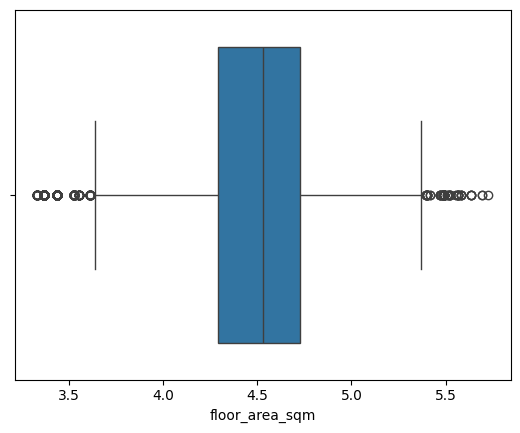

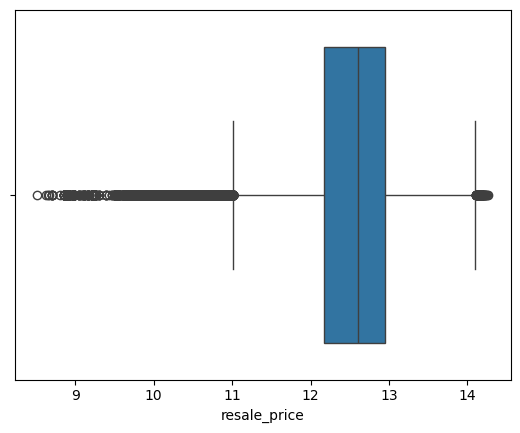

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
def box_plot(columns):

  for i in columns:
    sns.boxplot(data=df_sfr_ml,x=i)
    plt.show()

box_plot(['floor_area_sqm', 'resale_price'])

### After Treating Outliers

In [39]:
def treat_outliers(column):
  for i in column:
    iqr = np.percentile(df_sfr_ml[i],75) - np.percentile(df_sfr_ml[i],25)  # Q3 - Q1
    lower_bound =  np.percentile(df_sfr_ml[i],25) - (1.5 * iqr)
    upper_bound = np.percentile(df_sfr_ml[i],75) + (1.5 * iqr)
    df_sfr_ml[i] = df_sfr_ml[i].clip(lower_bound,upper_bound)
  print('Done !!!!')

treat_outliers(['floor_area_sqm', 'resale_price'])

Done !!!!


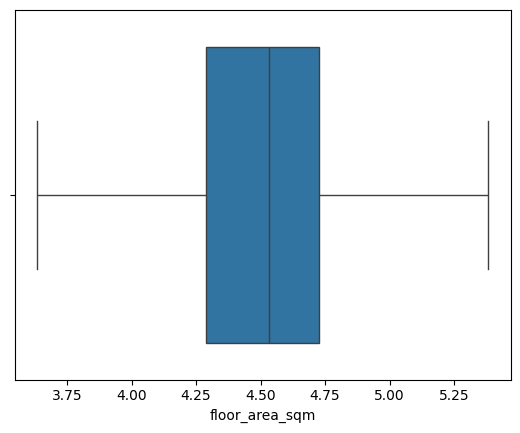

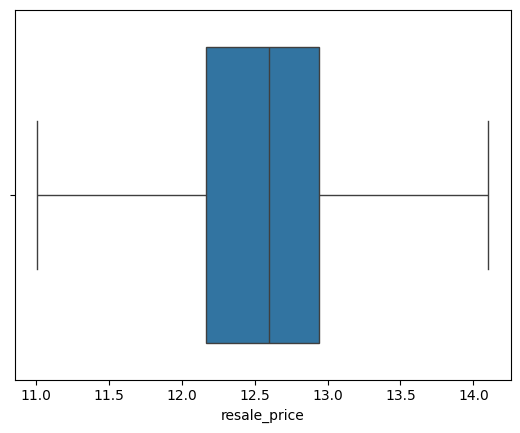

In [40]:
def box_plot(columns):

  for i in columns:
    sns.boxplot(data=df_sfr_ml,x=i)
    plt.show()

box_plot(['floor_area_sqm', 'resale_price'])

In [41]:
df_sfr_ml.to_csv('SRF_Processed_ML.csv',index=False)

In [35]:
from sklearn.model_selection import train_test_split

<Axes: >

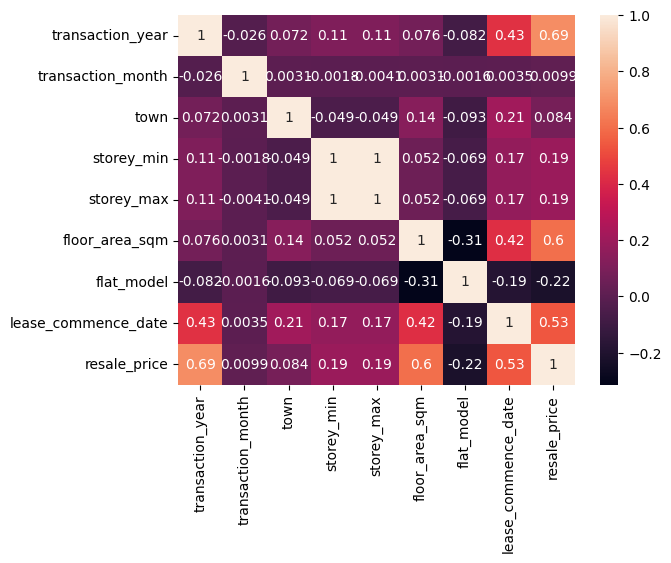

In [36]:
import seaborn as sns
# Correlation for the feature
corr_df = df_sfr_ml[['transaction_year','transaction_month','town','storey_min','storey_max','floor_area_sqm','flat_model','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True)

In [37]:
df_sfr_ml

,transaction_month,town,flat_type,block,street_name,storey_min,storey_max,floor_area_sqm,flat_model,lease_commence_date,resale_price,end_of_lease,transaction_year
0,1,0,0,830,13,10,12,3.635067,3,1977,11.011259,2076,1990
1,1,0,0,830,13,4,6,3.635067,3,1977,11.011259,2076,1990
2,1,0,0,830,13,10,12,3.635067,3,1977,11.011259,2076,1990
3,1,0,0,830,13,7,9,3.635067,3,1977,11.011259,2076,1990
4,1,0,2,447,13,4,6,4.290459,7,1976,11.011259,2075,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,26,5,1034,563,4,6,4.976734,1,1988,13.507626,2087,2024
926929,5,26,5,1019,563,1,3,4.983607,5,1988,13.612032,2087,2024
926930,5,26,5,750,567,1,3,5.129899,1,1992,13.847009,2091,2024
926931,5,26,5,1871,572,10,12,4.955827,1,1987,13.592367,2086,2024


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x = df_sfr_ml.drop(columns = 'resale_price', axis = 1)
y = df_sfr_ml['resale_price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [42]:
import pickle
from sklearn.model_selection import GridSearchCV

In [43]:
def model_regression(x,y,algorithm):
  for i in algorithm:
    
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
    model = i().fit(xtrain,ytrain)
    
    # predict for train and test accuracy
    y_train_pred = model.predict(xtrain)
    y_test_pred  = model.predict(xtest)

    # Accuracy score
    training = r2_score(ytrain,y_train_pred)
    testing = r2_score(ytest,y_test_pred)
    data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}
    print(data)

In [44]:
%%time
model_regression(x,y,[DecisionTreeRegressor,ExtraTreesRegressor,LinearRegression,LGBMRegressor,KNeighborsRegressor,RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,XGBRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 0.9997501819970757, 'Testing R2 Score': 0.9722321146339775}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.999753799560053, 'Testing R2 Score': 0.9827911615635918}
{'Algorithm': 'LinearRegression', 'Training R2 Score': 0.790138782688896, 'Testing R2 Score': 0.7912139915154166}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 741546, number of used features: 12
[LightGBM] [Info] Start training from score 12.529843
{'Algorithm': 'LGBMRegressor', 'Training R2 Score': 0.9741707488615985, 'Testing R2 Score': 0.9741204301528861}
{'Algorithm': 'KNeighborsRegressor', 'Training R2 Score': 0.9243270497837621, 'Testing R2 Score': 0.8815367008041596}
{'Algorithm'

### Hyperparameter tuning for Random Forest Model

In [45]:
%%time
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# test and train split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xgb = XGBRegressor()

# hyperparameters
param_distributions = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# randomizedsearchcv
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_distributions, n_iter=50, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)
print("Best hyperparameters:", random_search.best_params_)
best_model3 = random_search.best_estimator_
y_train_pred = best_model3.predict(X_train)
y_pred = best_model3.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
training = r2_score(y_train,y_train_pred)
r2 = r2_score(y_test, y_pred)

print(" ")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print(" ")
print('R-squared:', r2)
print(" ")
print('Training Accuracy:', training)
print('Test Accuracy:',r2)
print(" ")

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
 
Mean Squared Error: 0.0041185707824471915
Mean Absolute Error: 0.04472332309405641
Root Mean Squared Error: 0.06417609198484425
 
R-squared: 0.9876374995716359
 
Training Accuracy: 0.9902191567008265
Test Accuracy: 0.9876374995716359
 
CPU times: total: 4min 2s
Wall time: 12min 2s


### Best Model for Regression

In [46]:
print("Random-forest R²:", 0.9847682066706026)
print("XGB R²:", 0.982568419482608)
print("ExtraTreesRegressor R²:", 0.9827911615635918)

Random-forest R²: 0.9846360297208825
XGB R²: 0.9826371351483933
ExtraTreesRegressor R²: 0.9826371351483933


In [47]:
r_squared = {
    "Random-forest R²": 0.9847682066706026,
    "XGB R²": 0.982568419482608,
    "ExtraTreesRegressor R²": 0.9827911615635918,
}

best_model = max(r_squared, key=r_squared.get)
best_accuracy = r_squared[best_model]

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)
print("Explanation: The", best_model, "model achieved the highest R²_value of", best_accuracy)

Best Model: Random-forest R²
Best Accuracy: 0.9846360297208825
Explanation: The Random-forest R² model achieved the highest R²_value of 0.9846360297208825


In [61]:
best_model3

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

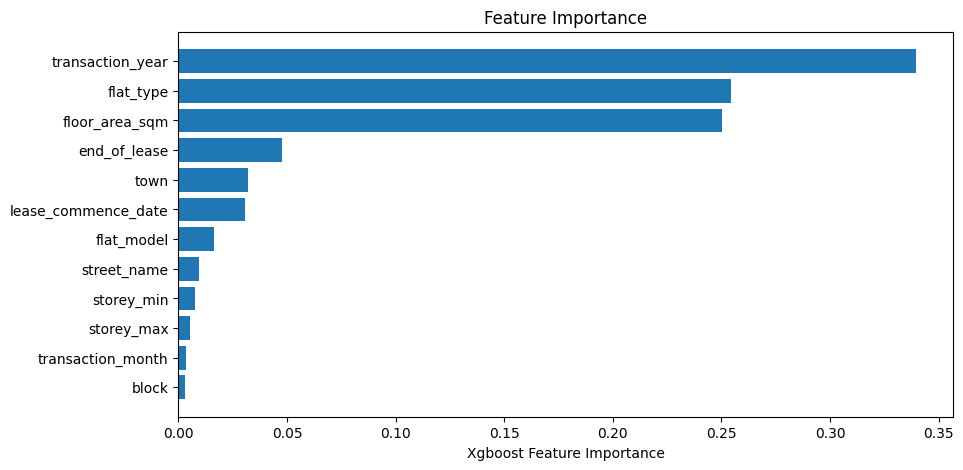

In [50]:
sorted_idx = best_model3.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(x.columns[sorted_idx], best_model3.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title("Feature Importance")

plt.show()

### Saving the model

In [51]:
import pickle
with open('modelxgbsfr.pkl', 'wb') as file:
    pickle.dump(best_model3, file)

### Predict with Model

In [62]:
file_path = "C:\\Users\\SANTHOSH RAJENDRAN\\Desktop\\GUVI Python\\Project-Singaporeflatresale\\SRF_Processed.csv"
df = pd.read_csv(file_path)

In [63]:
X = df.loc[1000]
X

transaction_month                    1
town                   KALLANG/WHAMPOA
flat_type                       3 ROOM
block                               68
street_name              GEYLANG BAHRU
storey_min                          10
storey_max                          12
floor_area_sqm                    65.0
flat_model                    Improved
lease_commence_date               1974
resale_price                   45500.0
end_of_lease                      2073
transaction_year                  1990
Name: 1000, dtype: object

In [57]:
file_path = "C:\\Users\\SANTHOSH RAJENDRAN\\Desktop\\GUVI Python\\Project-Singaporeflatresale\\SRF_Processed_ML.csv"
df = pd.read_csv(file_path)

In [58]:
x = df.loc[1000]
x.values.tolist()

[1.0,
 14.0,
 2.0,
 2019.0,
 188.0,
 10.0,
 12.0,
 4.174387269895637,
 3.0,
 1974.0,
 11.011258602457216,
 2073.0,
 1990.0]

In [60]:
selling_price = best_model3.predict([[1.0,14.0,2.0,2019.0,188.0,10.0,12.0,4.174387269895637,3.0,1974.0,2073.0,1990.0]])

import numpy as np

f'predicted Selling Price : {(np.exp(selling_price))}' f' Actual price {np.exp(11.011258602457216)}'

'predicted Selling Price : [59867.12] Actual price 60552.04986266776'